# **Project 7 Macine Learning Jupyter Notebook**
## **Author:** *Jackie Ganyo*
### **Purpose:** The project 7 notebook will show skills developed throughout the course as well as show knowledge gained in final module on machine learning. 

**Github project repository:**  https://github.com/JackieGanyo/datafun-07-ml

### **Part 0.** Setup Notebook and Import statements for the notebook.  

In [694]:
import jupyter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy as sp
from scipy import stats
import statsmodels as sm
import logging
import sklearn
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


### Define variable 'c' as a lambda function that converts fahrenheit to celsius. Create a list of tuples to plot. 


In [695]:
# define c
c = lambda f: 5/9*(f-32)

# create a list of tuples where each tuple is (f, c(f))
temps=[(f, c(f)) for f in range(0,101,10)]

### **Part 1. Chart a Straight Line**
 Plot the fahrenheit and celcius temperatures to visualize the relationsihp between the two variables.

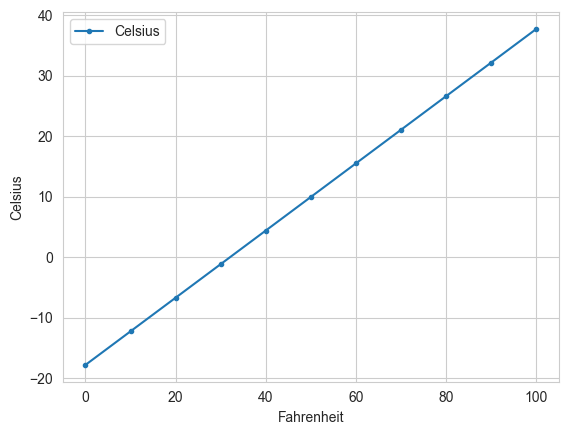

In [696]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


### **Part 2. Predict Average High Temperatures in NYC in January**
Upload New York City Average High Temperatures into a DataFrame. Print the first 5 rows and the last 5 rows. 

In [697]:
#Upload the data from csv file
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Print the first 5 rows of the data
print(df.head())

# Print the last 5 rows of the data
print(df.tail())


     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


##### Clean the Dataset to prepare for analysis:
1.  renaming value column.
2.  Remove the month notation on dates to simplify x axis labels & truncate last two digits on year


In [698]:
#1. Change "value" column name to "Temperature" 
df.columns = ['Date', 'Temperature', 'Anomaly']

df.head(3)


,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [699]:
#2. Remove the "January" from all dates

df.Date.dtype

#Use Integer division to truncate the last two digits 
df.Date = df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Calculate basic descriptive statistics on dataset

In [700]:
# Set precision for descriptive statistics--changed from text example because of VS Code error
pd.set_option('display.precision', 2)

# Descriptive statistics on data
df.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

##### Forecasting Future January Average High Temperatures

In [701]:
#Use stats from scipy to run linear regression on the data set
linear_regression = stats.linregress(x=df.Date, y=df.Temperature)

#print slope
print(f'Slope:', linear_regression.slope)

#print intercept
print(f'Intercept:', linear_regression.intercept)

#print R-squared value
r_squared = linear_regression.rvalue**2
print(f'R-squared:', r_squared)

Slope: 0.014771361132966163
Intercept: 8.694993233674289
R-squared: 0.013674417965163782


##### Use the linear regression model to 
1. predict the average high temperature in NYC for 2019
2. approximate average temperature for years prior to 1895
3. predict the average high temperature in NYC for 2024 

In [702]:
#1. Use linear regression model and Year 2019
linear_regression.slope * 2019 + linear_regression.intercept

print(f'Predicted temperature in 2019:', linear_regression.slope * 2019 + linear_regression.intercept)

#2. Approximate the average high temperature in 1890
linear_regression.slope * 1890 + linear_regression.intercept    

print(f'Predicted temperature in 1890:', linear_regression.slope * 1890 + linear_regression.intercept)

#3.  Approximate the average high temperature in 2024
linear_regression.slope * 2024 + linear_regression.intercept

print(f'Predicted temperature in 2024:', linear_regression.slope * 2024 + linear_regression.intercept)

#4. Use model to determine value for 1895
linear_regression.slope * 1895 + linear_regression.intercept
print(f'Predicted temperature in 1895:', linear_regression.slope * 1895 + linear_regression.intercept)

# Calculate the R-squared value
r_squared = linear_regression.rvalue**2
print(f"R-squared: {r_squared}")

Predicted temperature in 2019: 38.51837136113297
Predicted temperature in 1890: 36.612865774980335
Predicted temperature in 2024: 38.5922281667978
Predicted temperature in 1895: 36.68672258064517
R-squared: 0.013674417965163782


##### Plotting the Average temperature and a Regression Line using Seaborn's regplot function with the date on the x axis and the temperatures on the y-axis. 

Text(0.5, 1.0, 'Average High Temperature in January in NYC - LinRegress method')

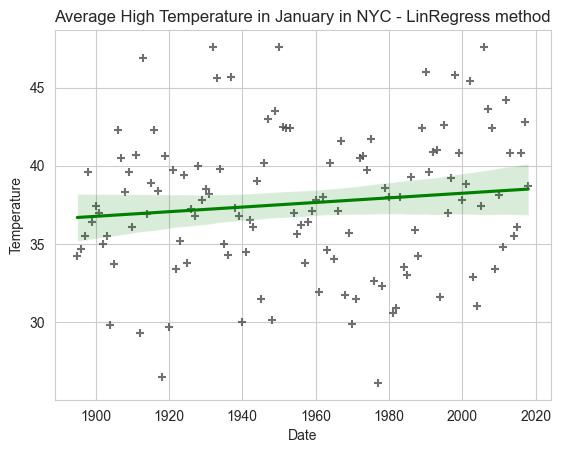

In [703]:
#set style and axes for plot
sns.set_style('whitegrid')
axes = sns.regplot(x=df.Date, y=df.Temperature, marker='+', color=".3", line_kws=dict(color="g"))
axes.set_title('Average High Temperature in January in NYC - LinRegress method')

##### Change y axis scale to improve view of linear relationship by increasing the range (10-70 degrees).

Text(0.5, 1.0, 'Average High Temperature in January in NYC - LinRegess Method')

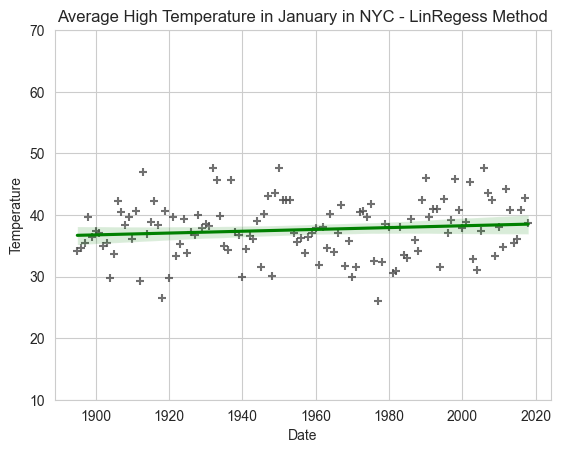

In [704]:
#set style and axes for plot
sns.set_style('whitegrid')
axes = sns.regplot(x=df.Date, y=df.Temperature, marker='+', color=".3", line_kws=dict(color="g"))

#set limit for y-axis to improve the plot
axes.set_ylim(10, 70)
axes.set_title('Average High Temperature in January in NYC - LinRegess Method')


##### **Part 3. Predicting Average High Temperatures in NYC in January**

Use a different approach (scikit-learn estimator) to create another model. We can utilize the initial code from before (upload data, Change data, and change columns).

In [705]:
#Prep data for new analysis
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

df.columns = ['Date', 'Temperature', 'Anomaly']

df.Date =df.Date.floordiv(100)

df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Split the data for Training and Testing

In [706]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test =train_test_split(df.Date.values.reshape(-1,1), df.Temperature.values, random_state=11)

#Show shape of training and testing sets
x_train.shape
print(f'x_train shape', x_train.shape)

x_test.shape
print(f'x_test shape', x_test.shape)


x_train shape (93, 1)
x_test shape (31, 1)


##### Train the model using the training data.

In [707]:
#Define the model name 'linear_regression' and train the model using the training data

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

#Show the slope and intercept of the model
print(f'Slope:', linear_regression.coef_)
print(f'Intercept:', linear_regression.intercept_)

#Predict the temperature using the testing data
y_pred = linear_regression.predict(x_test)
y_expected = y_test

for predicted, expected in zip(y_pred[::5], y_expected[::5]):
    print(f'predicted: {predicted:.2f}, expected: {expected:.2f}')

#Calculate the mean squared error   
    r_squared = r2_score(y_expected, y_pred)
    print(f'R-squared: {r_squared}')    


Slope: [0.01939167]
Intercept: -0.30779820252656975
predicted: 37.86, expected: 31.70
R-squared: -0.033370346388810646
predicted: 38.69, expected: 34.80
R-squared: -0.033370346388810646
predicted: 37.00, expected: 39.40
R-squared: -0.033370346388810646
predicted: 37.25, expected: 45.70
R-squared: -0.033370346388810646
predicted: 38.05, expected: 32.30
R-squared: -0.033370346388810646
predicted: 37.64, expected: 33.80
R-squared: -0.033370346388810646
predicted: 36.94, expected: 39.70
R-squared: -0.033370346388810646


##### Use the trained model to predict the average temperature for 2019, 1890, 2024, and 1895. 

In [708]:
#define the predict function
predict =(lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

#Use the trained model to predict the temperature in 2019
print(f'Predicted average high temperature for 2019: {predict(2019)}')

#Use the trained model to predict the temperature in 1890
print(f'Predicted average high temperature for 1890: {predict(1890)}')

#Use the trained model to predict the temperature in 2024
print(f'Predicted average high temperature for 2024: {predict(2024)}')

#Use 1895 for comparison to actual recorded data
print(f'Predicted average high temperature for 1895: {predict(1895)}')


Predicted average high temperature for 2019: [38.84399018]
Predicted average high temperature for 1890: [36.34246432]
Predicted average high temperature for 2024: [38.94094855]
Predicted average high temperature for 1895: [36.43942269]


##### Visualizing the Dataset with the regression line

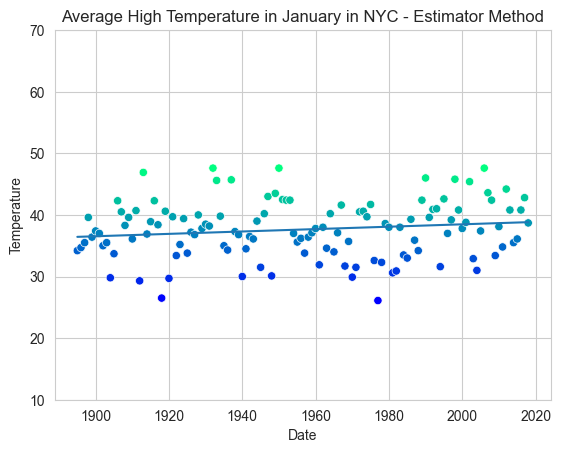

In [709]:
#Build the Scatter plot using Seaborn
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
axes.set_title('Average High Temperature in January in NYC - Estimator Method')

#Plot the regression line
x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

##### **Part 4:  Insights comparing the two models**


The two models developed during this modules exercises are as follows. 
| Method                    | Resulting Model             | R-squared Values |
|:----------------------------|:------------------------------|:-------------|
|*Stats LinRegress model:*   | y = 0.01477136 * x + 8.869499323  | 0.013674417965163782|
|*Scikit-learn estimator Linear_Regression model:* | y = 0.01939167 * x + (-0.307798203) |-0.033370346388810646|

Both models are plotted as *scatterplots* (recorded data from csv) with the corresponding *linear regression line*.  The resulting models show that the linear regression lines go through the 'center' of the data points which is the expected outcome for linear regression. While neither model accurately predicts the high for a given year, both models give a 'close' value to give individual's a good idea of what to expect for temperatures.  Thus allowing individual's to plan activities and dress appropriately for the temperatures.  If the intent of this model is to simply provide this style information, then the model would be 'good enough'.  As an analyst and mathematician, I would dig deeper as these models could be missing key aspects with in the dataset. 

|Year                   |Stats Model       | Estimator Model   |
|:-----------------|:--------------|:-----------------|
|1890              |36.61         | 36.34       |
|2019    |38.52    |38.84   |
|2024    |38.59    |38.94 |

From a mathematical perspective, neither model does a good job of predicting the relationship between year and average temperature.  For our dataset, the ***r-squared values** help us determine how well a model predicts the relationship between year and temperature*.  The R-squared values range from 0-1 with higher values generally considered to represent a better model fit.  The acceptable r-squared values vary based upon the application with social science sector accepting values between 0.59-0.99 and financial sectors requiring above 0.70.  

The Stats LinRegress (1st) model predicts 1% (0.013) of the year-temperature relationship which is a poor representation of actual data.  The Scikit-learn estimator (2nd) model predicts -3% (-0.03) of the relationship between year and temperature. The models developed during this exercise would be good examples of ***underfitting***. While our plots look like good fits to the data, using the models to predict show that the models don't predict the values within the set. 

Since the r-squared values are so low for both models, I would investigate a different relationship between year and temperature.  The relationship may not be linear; it could be represented better by a polynomial regression. 

 [How to Interpret R-squared in Regression Analysis](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)

 [What is R Squared? R2 Value Meaning and Definition](https://www.freecodecamp.org/news/what-is-r-squared-r2-value-meaning-and-definition/#:~:text=R%2DSquared%20(R%C2%B2)%20is,observed%20data%20(dependent%20variable))

 [Social Science R-squared values](https://mpra.ub.uni-muenchen.de/115769/1/MPRA_paper_115769.pdf)

 [Finance R-squared values](https://www.investopedia.com/terms/r/r-squared.asp#:~:text=In%20finance%2C%20an%20R%2Dsquared,would%20show%20a%20low%20correlation)

 [Underfitting and Overfitting in ML](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)


